In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
raw = pd.read_csv("PLS_FY2014_AE_pupld14a.csv")

In [19]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9305 entries, 0 to 9304
Columns: 159 entries, STABR to YR_SUB
dtypes: float64(9), int64(62), object(88)
memory usage: 11.3+ MB


In [20]:
#variables to use in the model
to_use = ['C_LEGBAS', 'GEOCODE', 'POPU_LSA', 'OBEREG', 'LOCALE', 'TOTCIR']
to_use_df = raw[to_use]
to_use_df.head()

,C_LEGBAS,GEOCODE,POPU_LSA,OBEREG,LOCALE,TOTCIR
0,NP,CI1,2059,8,43,11607
1,CO,MA1,300549,8,11,1886620
2,CI,CI1,209,8,43,1092
3,MJ,CI1,6241,8,33,12347
4,CO,CO1,12793,8,42,59630


In [21]:
to_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9305 entries, 0 to 9304
Data columns (total 6 columns):
C_LEGBAS    9305 non-null object
GEOCODE     9305 non-null object
POPU_LSA    9305 non-null int64
OBEREG      9305 non-null int64
LOCALE      9305 non-null object
TOTCIR      9305 non-null int64
dtypes: int64(3), object(3)
memory usage: 436.2+ KB


In [22]:
to_use_df.describe()
# -3 and -1 are missing

,POPU_LSA,OBEREG,TOTCIR
count,9.305000e+03,9305.000000,9.305000e+03
mean,3.434550e+04,3.726384,2.487170e+05
std,1.365817e+05,1.978533,1.027975e+06
min,-3.000000e+00,1.000000,-3.000000e+00
25%,2.190000e+03,2.000000,1.146800e+04
50%,7.284000e+03,3.000000,4.099700e+04
75%,2.280800e+04,5.000000,1.432910e+05
max,4.008651e+06,9.000000,2.410174e+07


In [23]:
to_use_df['C_LEGBAS'].value_counts()

CI    4944
LD    1388
NP    1344
CO     916
MJ     306
SD     176
OT      91
CC      87
NL      53
Name: C_LEGBAS, dtype: int64

In [24]:
to_use_df['GEOCODE'].value_counts()

CI1    3357
OTH    2150
CI2    1494
CO1    1129
CO2     508
SD1     423
MC1     129
SD2      52
MC2      42
MA1      11
MA2      10
Name: GEOCODE, dtype: int64

In [25]:
to_use_df['OBEREG'].value_counts()

3    1883
4    1620
2    1553
1    1288
5    1162
6     859
8     483
7     395
9      62
Name: OBEREG, dtype: int64

In [26]:
to_use_df['LOCALE'].value_counts()
#period is missing

42    2041
21    1881
43    1613
32    1057
33     647
41     505
31     502
13     296
22     258
23     206
12     117
.      106
11      76
Name: LOCALE, dtype: int64

In [27]:
#replace missing data
temp_median = to_use_df['TOTCIR'].median()
to_use_df['TOTCIR'] = to_use_df['TOTCIR'].replace(to_replace=-3.0, value=temp_median)
to_use_df['TOTCIR'] = to_use_df['TOTCIR'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [28]:
temp_median = to_use_df['POPU_LSA'].median()
to_use_df['POPU_LSA'] = to_use_df['POPU_LSA'].replace(to_replace=-3.0, value=temp_median)
to_use_df['POPU_LSA'] = to_use_df['POPU_LSA'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [29]:
to_use_df.describe()

,POPU_LSA,OBEREG,TOTCIR
count,9.305000e+03,9305.000000,9.305000e+03
mean,3.435333e+04,3.726384,2.489638e+05
std,1.365800e+05,1.978533,1.027920e+06
min,1.000000e+01,1.000000,0.000000e+00
25%,2.201000e+03,2.000000,1.191400e+04
50%,7.284000e+03,3.000000,4.099700e+04
75%,2.280800e+04,5.000000,1.432910e+05
max,4.008651e+06,9.000000,2.410174e+07


In [10]:
#to_use = ['C_LEGBAS', 'GEOCODE', 'POPU_LSA', 'OBEREG', 'LOCALE', 'TOTCIR']
temp_mode = to_use_df['LOCALE'].mode()
to_use_df['LOCALE'] = to_use_df['LOCALE'].replace(to_replace='.', value=temp_mode)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [11]:
to_use_df['LOCALE'].value_counts()

42    2041
21    1881
43    1613
32    1057
33     647
41     505
31     502
13     296
22     258
23     206
12     117
.      106
11      76
Name: LOCALE, dtype: int64

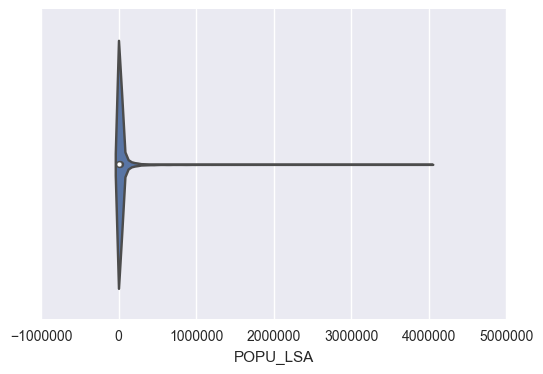

In [97]:
sns.violinplot(to_use_df['POPU_LSA'])

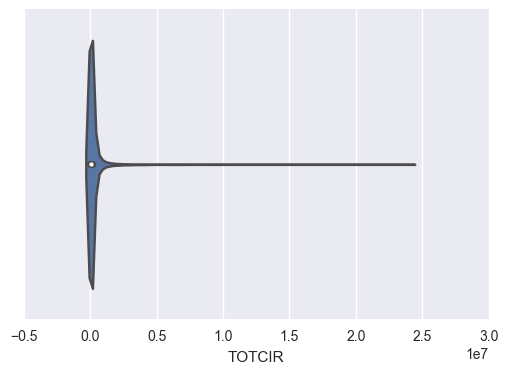

In [98]:
sns.violinplot(to_use_df['TOTCIR'])

In [99]:
log_columns = ['POPU_LSA', 'TOTCIR',]
log_df = to_use_df.copy()
log_df[log_columns] = log_df[log_columns].apply(np.log10)

In [100]:
log_df.head()

,C_LEGBAS,GEOCODE,POPU_LSA,OBEREG,LOCALE,TOTCIR
0,NP,CI1,3.313656,8,43,4.064720
1,CO,MA1,5.477915,8,11,6.275684
2,CI,CI1,2.320146,8,43,3.038223
3,MJ,CI1,3.795254,8,33,4.091561
4,CO,CO1,4.106972,8,42,4.775465


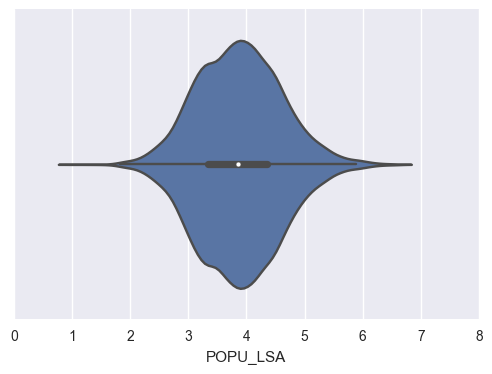

In [101]:
sns.violinplot(log_df['POPU_LSA'])

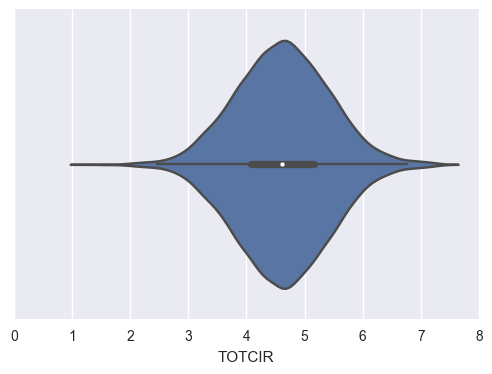

In [102]:
sns.violinplot(log_df['TOTCIR'])

In [103]:
#dummy variables
dummy_df = pd.get_dummies(log_df, columns=['C_LEGBAS', 'GEOCODE', 'OBEREG', 'LOCALE'], drop_first=True)

In [104]:
dummy_df.head()

,POPU_LSA,TOTCIR,C_LEGBAS_CI,C_LEGBAS_CO,C_LEGBAS_LD,C_LEGBAS_MJ,C_LEGBAS_NL,C_LEGBAS_NP,C_LEGBAS_OT,C_LEGBAS_SD,...,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,LOCALE_42,LOCALE_43
0,3.313656,4.064720,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.477915,6.275684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.320146,3.038223,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.795254,4.091561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.106972,4.775465,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [105]:
#correlation matrix
dummy_df.corr()

,POPU_LSA,TOTCIR,C_LEGBAS_CI,C_LEGBAS_CO,C_LEGBAS_LD,C_LEGBAS_MJ,C_LEGBAS_NL,C_LEGBAS_NP,C_LEGBAS_OT,C_LEGBAS_SD,...,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,LOCALE_42,LOCALE_43
POPU_LSA,1.000000,0.862533,-0.244564,0.277708,0.090338,0.132426,-0.058600,-0.073469,0.029201,0.030681,...,0.228467,0.335654,0.104531,0.052298,0.052111,0.102664,0.060149,-0.052099,-0.313918,-0.429378
TOTCIR,0.862533,1.000000,-0.170383,0.195202,0.124129,0.073736,-0.112366,-0.107233,0.018156,0.072118,...,0.216686,0.359039,0.096474,0.035195,0.052943,0.078049,0.043717,-0.051656,-0.317085,-0.383898
C_LEGBAS_CI,-0.244564,-0.170383,1.000000,-0.351835,-0.445821,-0.196340,-0.080587,-0.437484,-0.105814,-0.147840,...,0.015618,0.002453,0.026125,-0.015301,-0.036917,-0.054711,-0.010811,-0.006008,-0.010117,0.068821
C_LEGBAS_CO,0.277708,0.195202,-0.351835,1.000000,-0.138359,-0.060934,-0.025010,-0.135771,-0.032839,-0.045881,...,0.020270,-0.060335,0.014505,-0.012943,-0.013441,0.073835,0.068513,-0.034574,-0.055723,0.024981
C_LEGBAS_LD,0.090338,0.124129,-0.445821,-0.138359,1.000000,-0.077211,-0.031691,-0.172040,-0.041611,-0.058138,...,-0.015734,0.023599,-0.032125,0.016959,0.030869,0.027883,-0.002978,-0.020412,0.025916,-0.055470
C_LEGBAS_MJ,0.132426,0.073736,-0.196340,-0.060934,-0.077211,1.000000,-0.013957,-0.075767,-0.018326,-0.025604,...,0.014648,-0.059808,-0.001778,-0.011363,-0.017361,0.019447,0.008821,-0.017575,0.015845,0.026992
C_LEGBAS_NL,-0.058600,-0.112366,-0.080587,-0.025010,-0.031691,-0.013957,1.000000,-0.031098,-0.007522,-0.010509,...,-0.005582,-0.023874,-0.012781,-0.011388,-0.018074,-0.009093,0.001767,0.025993,0.004744,0.040790
C_LEGBAS_NP,-0.073469,-0.107233,-0.437484,-0.135771,-0.172040,-0.075767,-0.031098,1.000000,-0.040833,-0.057051,...,-0.023959,0.045911,-0.009803,0.021288,0.031789,-0.036294,-0.059436,0.071598,0.039305,-0.061361
C_LEGBAS_OT,0.029201,0.018156,-0.105814,-0.032839,-0.041611,-0.018326,-0.007522,-0.040833,1.000000,-0.013799,...,-0.005568,0.072346,-0.003480,-0.000108,-0.009230,-0.014927,0.002888,0.000295,-0.031565,-0.022429
C_LEGBAS_SD,0.030681,0.072118,-0.147840,-0.045881,-0.058138,-0.025604,-0.010509,-0.057051,-0.013799,1.000000,...,-0.020673,0.010651,-0.004228,0.005917,0.040176,0.034825,-0.013144,-0.008886,0.010286,-0.044827
